# 프로젝트 : Telco Customer Churn 고객 유지를 위한 행동 예측(이탈 방지)

시각화 자료의 파스텔 색상은 어떤걸로??: 분야에서 통용되는 범위 내에서 상사가 좋아하는 색상, 분야에 통용되는 색은 무엇일까??

customerID : 고객 id

gender : 성별

SeniorCitizen : 고령자(yes:1, no:0)

Partner : 파트너

Dependents : 부양 가족

tenure : 보유 개월 수(고객이 머물렀던 개월 수)

PhoneService : 휴대폰 서비스

MultipleLines : 여러회선 여부( 예, 아니오, 전화 서비스 없음)

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

OnlineSecurity : 온라인 보안 여부(예, 아니오, 전화서비스 없음)

OnlineBackup : 온라인 백업 여부(예, 아니오, 전화서비스 없음)

DeviceProtection : 장치보호 여부(예, 아니요, 인터넷 서비스 없음)

TechSupport : 기술지원 여부(예, 아니요, 인터넷 서비스 없음)

StreamingTV : StreamingTV보유 여부(예, 아니요, 인터넷 서비스 없음)

StreamingMovies : 스트리밍 영화 보유 여부(예, 아니요, 인터넷 서비스 없음)

Contract : 계약(계약기간 월간, 1년, 2년)

PaperlessBilling : 종이없는 결제(예, 아니요)

PaymentMethod : 고객의 결제 수단 (전자 수표, 우편 수표, 은행 송금 (자동), 신용 카드 (자동))

MonthlyCharges : 월간 요금

TotalCharges : 총 요금

Churn : 지난달 퇴사한 고객

In [331]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [333]:
data = pd.read_csv('/content/Mydrive/MyDrive/datascience/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [334]:
# pd.DataFrame(abs(data.corr()['Churn']).sort_values(ascending = False))

# 데이터 확인하기

In [335]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [336]:
data['SeniorCitizen'].unique()

array([0, 1])

In [337]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [339]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

빈 값이 없다, 7043개의 데이터가 존재한다.

In [340]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


고객아이디는 불필요한 정보이다.

In [341]:
data = data.iloc[:,1:]
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **가설1)** 단기계약일수록 이탈할 가능성이 높지 않을까?

In [342]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


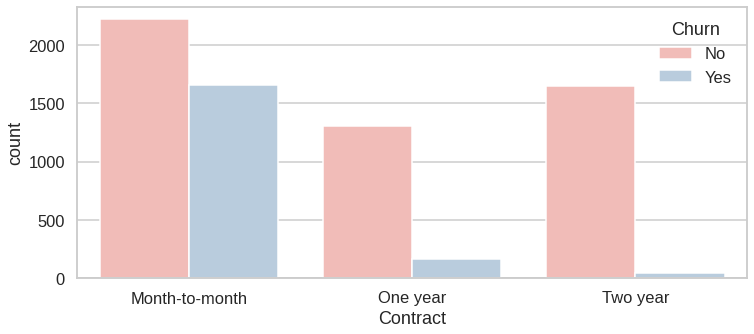

In [343]:
plt.figure(figsize= (12, 5))
plt.style.use('seaborn-whitegrid') # setting "테마"(matplot으로)
#sns.set_style('darkgrid') seaborn 으로 setting
sns.set_context('talk')
sns.set_palette("Pastel1")

sns.countplot(data['Contract'], hue = data['Churn'])

In [344]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [345]:
Contract_map = {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2}
data['Contract'] = data['Contract'].map(Contract_map)
data['Contract'].unique()

array([0, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


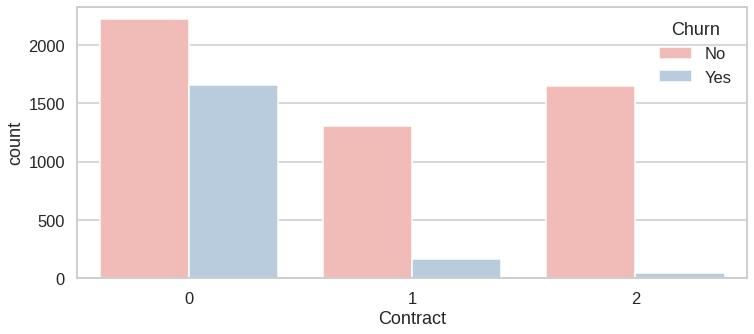

In [346]:
plt.figure(figsize= (12, 5))
plt.style.use('seaborn-whitegrid') 
#sns.set_style('darkgrid') 
sns.set_context('talk')
sns.set_palette('Pastel1')
sns.countplot(data['Contract'], hue = data['Churn'])

월별 계약일수록 이탈가능성이 높으며 장기계약인 2년계약시 가장 이탈율이 낮다

- 인사이트 :  **장기 계약 고객으로 만들수록 이탈율을 줄일 수 있다.**

## 가설2) 오래 유지한 고객일 수록 이탈이 적지 않을까?

In [347]:
data['tenure'].min()

0

In [348]:
data['tenure'].max()

72

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


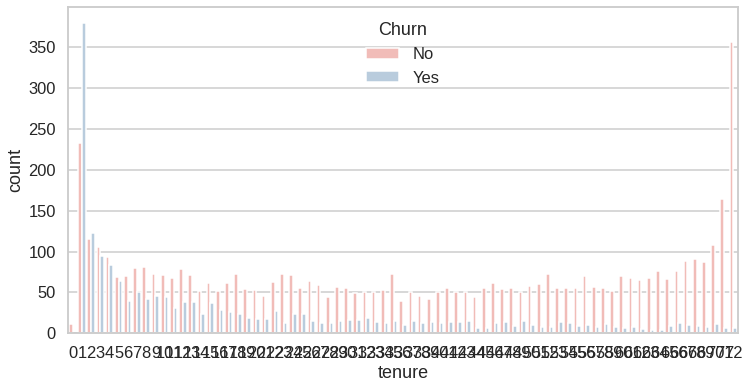

In [349]:
plt.figure(figsize = (12,6))
sns.set_context('talk')
sns.set_palette('Pastel1')
sns.countplot(data['tenure'], hue = data['Churn'])

5개월 이하의 고객들의 이탈율이 높은것으로 보인다. 비율을 확인해 보자

In [350]:
data.loc[(data['tenure']<=5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()

744

In [351]:
data.loc[(data['tenure']>5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()

1125

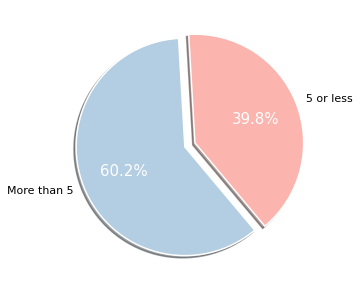

In [352]:
plt.figure(figsize= (12,5))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('Pastel1')

size1 = data.loc[(data['tenure']<=5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
size2 = data.loc[(data['tenure']>5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
sizes = [size1, size2]
labels = ["5 or less","More than 5"]


patches, texts, autotexts = plt.pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0,0.1),
                                   startangle = 310)

for t in texts:
    t.set_fontsize(11)
    t.set_color("black")
    
for at in autotexts:
    at.set_fontsize(15)
    at.set_color('white')
    
plt.show()

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


고객 이탈여부를 나타내는 Churn컬럼 역시 미리 변환시켜준다.

In [354]:
Churn_mapping = {'No' : 0, 'Yes' : 1}
data['Churn'] = data['Churn'].map(Churn_mapping)

너무 많은 데이터를 가지고 있어서 우서 5개의 카테고리로 묶어준다.

In [355]:
data['tenure'] = pd.cut(data['tenure'],5)
data['tenure'].unique()

[(-0.072, 14.4], (28.8, 43.2], (43.2, 57.6], (14.4, 28.8], (57.6, 72.0]]
Categories (5, interval[float64]): [(-0.072, 14.4] < (14.4, 28.8] < (28.8, 43.2] < (43.2, 57.6] <
                                    (57.6, 72.0]]

In [357]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['tenure'] = le.fit_transform(data['tenure'])

In [324]:
## 5개월까지 한개의 카테고리로 묶고(데이터의 크기가 큰 범위), 나머지를 4개의 범위로 묶어주는방법 (이 방법과 위의 5개로 그냥 나누어준것중에 어떤것이 더 높을까?? 개인적인 생각으로는 전자다)
#data.loc[data['tenure']<=5,'tenure'] = 0
#data.loc[(data['tenure']>5) &  (data['tenure']<=22),'tenure'] = 1
#data.loc[(data['tenure']>22) &  (data['tenure']<=39),'tenure'] = 2
#data.loc[(data['tenure']>39) &  (data['tenure']<=56),'tenure'] = 3
#data.loc[(data['tenure']>56) &  (data['tenure']<=72),'tenure'] = 4
#data['tenure']

In [252]:
pd.crosstab(data.tenure, data.Churn,margins=True)

Churn,0,1,All
tenure,,,
0,1272,1099,2371
1,831,295,1126
2,774,215,989
3,805,142,947
4,1492,118,1610
All,5174,1869,7043


In [253]:
pd.crosstab(data.tenure, data.Churn,normalize=True)

Churn,0,1
tenure,,
0,0.180605,0.156041
1,0.117989,0.041886
2,0.109896,0.030527
3,0.114298,0.020162
4,0.211842,0.016754


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


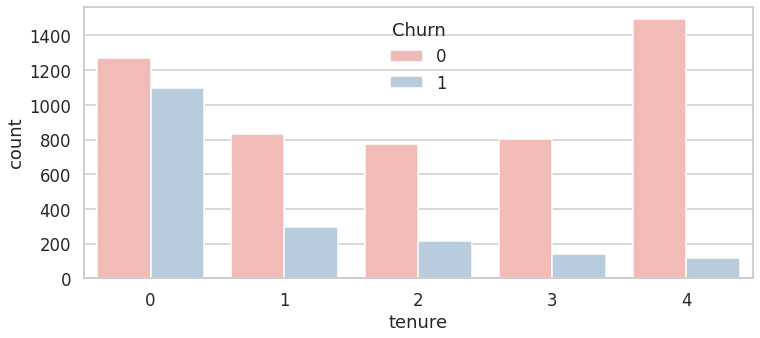

In [254]:
plt.figure(figsize = (12,5))
sns.set_context('talk')
sns.set_palette('Pastel1')
sns.countplot(data['tenure'], hue = data['Churn'])

장기간 이용할 수록 이탈하는 고객들이 줄어든다
- 인사이트 : **대략 5개월을 초과한 기간 만큼 고객을 유지시킨다면 이탈률을 크게 낮출 수 있으므로 초반 가입 고객들에게 오래유지할 수 있는 서비스를 기획하거나 5개월 넘게 이용한 고객의 특징을 살펴본후 대입해 본다.**

- 현재 최 장기간 이용 고객들이 상당히 많은 수치를 가지고 있는것으로 보아 현재 서비스가 잘 이루어 지고 있다는것을 알 수 있다. 하지만 좀 더 좋은 초반 서비스를 통해 초기 보유 고객의 니즈를 충족시켜 주어야할것 같다.

## 성별에 따른 이탈차이도 있을까?


In [255]:
print(data.loc[data['gender']=='Male']['gender'].count())
print(data.loc[data['gender']=='Female']['gender'].count())

3555
3488


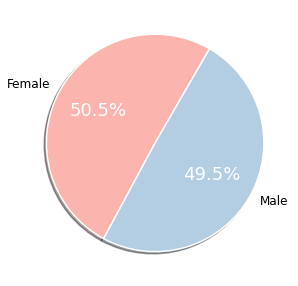

In [256]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
patches, texts, autotexts = plt.pie([3555,3488],
                                    labels = ['Female', 'Male'],
                                    autopct='%1.1f%%',
                                    shadow = True,
                                    startangle = 60
                                    )
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

for a in autotexts:
  a.set_fontsize(18)
  a.set_color('white')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


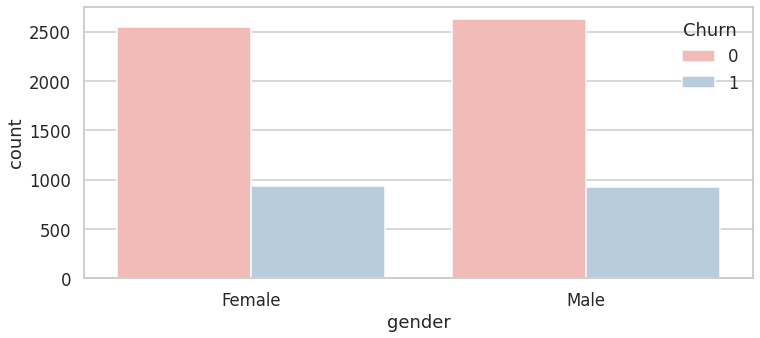

In [257]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
sns.countplot(data['gender'], hue = data.Churn)

성별에 따른 인사이트는 얻기 힘들어 보인다.

In [258]:
sex_mapping = {'Female' : 0, 'Male' : 1}
data['gender'] = data['gender'].map(sex_mapping)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,0,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,1,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.5,0
2,1,0,No,No,0,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,1,0,No,No,3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,No,No,0,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,Yes,1,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1,Yes,Mailed check,84.80,1990.5,0
7039,0,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,Yes,Credit card (automatic),103.20,7362.9,0
7040,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,No,No,No,No,0,Yes,Electronic check,29.60,346.45,0
7041,1,1,Yes,No,0,Yes,Yes,Fiber optic,No,No,No,No,No,No,0,Yes,Mailed check,74.40,306.6,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


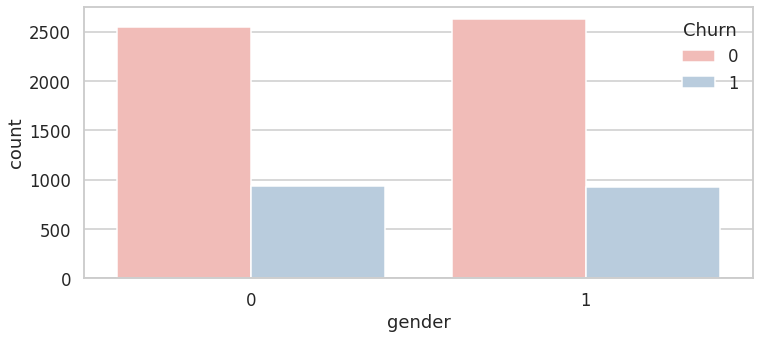

In [259]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
sns.countplot(data['gender'], hue = data.Churn)

## 고령자와 이탈에는 어떤 관계가 있을까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


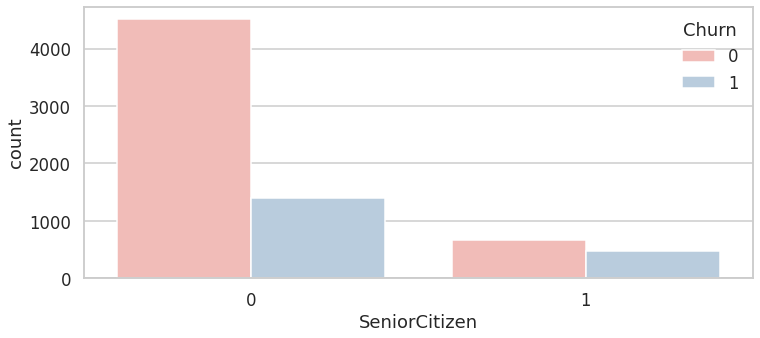

In [260]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
sns.countplot(data.SeniorCitizen, hue = data.Churn)
# 비고령자 = 0 , 고령자 = 1

In [261]:
pd.crosstab(data.SeniorCitizen, data.Churn, margins= True)

Churn,0,1,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


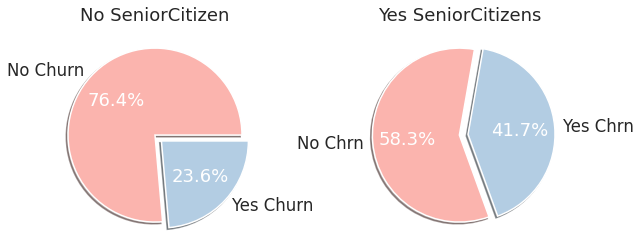

In [363]:
# 기본 세팅
fig, ax = plt.subplots(1,2,figsize = (10,4))
sns.set_context('talk')
sns.set_palette('Pastel1')

# 젊은 고객
labels = ["No Churn", "Yes Churn"]

no_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']==0),'SeniorCitizen'].value_counts().sum()
yes_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']==1),'SeniorCitizen'].value_counts().sum()
sizes = [no_sizes, yes_sizes]


patches, texts, autotexts = ax[0].pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0, 0.1))

ax[0].set_title("No SeniorCitizen")

for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')
    
    
# 고령 고객
Senior_labels = ["No Chrn", "Yes Chrn"]

Senior_y_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']==0),'SeniorCitizen'].\
value_counts().sum()

Senior_n_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']==1),'SeniorCitizen'].\
value_counts().sum()

Senior_sizes = [Senior_y_sizes, Senior_n_sizes]

patches, texts, autotexts = ax[1].pie(Senior_sizes,
                                     labels = Senior_labels,
                                     autopct = "%1.1f%%",
                                     shadow = True,
                                     explode = (0, 0.1),
                                     startangle = 80)


ax[1].set_title("Yes SeniorCitizens")
    
for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')



plt.show()

- 인사이트 : **바로 고령자 분들을 위한 서비스를 만드는 것이다. 상대적으로 적은 인원수 이기에 우선순위는 아니지만 향 후 젊은 계층의 사람들이 시간이 흘렀을때 고령자가 되어 이탈을 방지 하기 위함이다.(세계적으로 점점 출산율이 줄어들기 때문에 향후에는 이것이 최 우선순위가 될 수 도 있을것 같다)**




## 파트너 혹은 부양가족에 따른 이탈률을 알아보자


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dependents and Churn correlation')

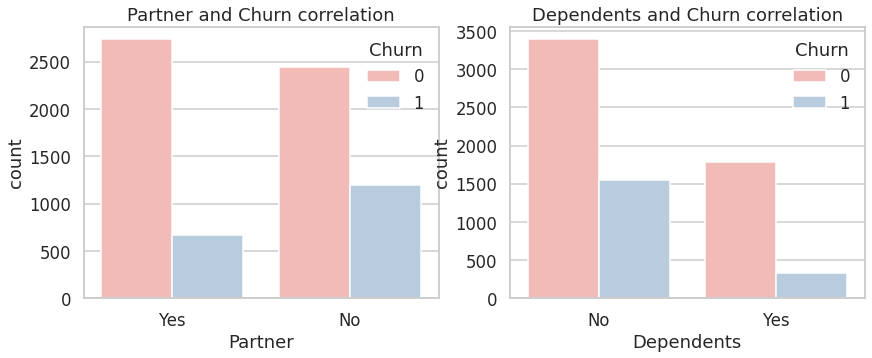

In [262]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('Pastel1')

sns.countplot(data['Partner'], hue = data['Churn'], ax = ax[0])
ax[0].set_title('Partner and Churn correlation')

sns.countplot(data['Dependents'], hue =data['Churn'], ax = ax[1])
ax[1].set_title('Dependents and Churn correlation')

In [263]:
# 인코딩

왜 파트너 혹은 부양가족이 없으면 더 많은 이탈이 일어날까?

## 가설3) 파트너 혹은 부양가족이 있으면 이탈율이 적은데 

서비스측면에서 부가적인 혜택이 있는가?

이를 알아보기 위해 먼저 요금을 확인해 보자

In [264]:
data['MonthlyCharges'].nunique()

1585

In [265]:
data['MonthlyCharges'].min()

18.25

In [266]:
data['MonthlyCharges'].max()

118.75

In [267]:
data['MonthlyCharges'] = pd.cut(data['MonthlyCharges'], 6)
data['MonthlyCharges'].unique()

[(18.15, 35.0], (51.75, 68.5], (35.0, 51.75], (68.5, 85.25], (85.25, 102.0], (102.0, 118.75]]
Categories (6, interval[float64]): [(18.15, 35.0] < (35.0, 51.75] < (51.75, 68.5] < (68.5, 85.25] <
                                    (85.25, 102.0] < (102.0, 118.75]]

어떻게 해야 파트너 혹은 부양가족이 있는 유저들이 그렇지 않은 유저와 요금을 통해 비교해 볼 수 있을까?

In [268]:
#a = data.loc[(data['Partner'] == 'Yes') & (data['Dependents'] == 'Yes'),'MonthlyCharges']
#b = data.loc[data['Partner'] == 'Yes','MonthlyCharges']
#c = data.loc[data['Dependents'] == 'Yes', :]
d = data.loc[data['Partner'] == 'Yes','Partner']
e = data.loc[data['Partner'] == 'No','Partner']
#pd.crosstab(d, data.MonthlyCharges,margins=True)
pd.crosstab(e, data.MonthlyCharges,margins=True)


MonthlyCharges,"(18.15, 35.0]","(35.0, 51.75]","(51.75, 68.5]","(68.5, 85.25]","(85.25, 102.0]","(102.0, 118.75]",All
Partner,,,,,,,
No,925,468,425,900,666,257,3641
All,925,468,425,900,666,257,3641


In [269]:
pd.crosstab(d, data.MonthlyCharges,margins=True)

MonthlyCharges,"(18.15, 35.0]","(35.0, 51.75]","(51.75, 68.5]","(68.5, 85.25]","(85.25, 102.0]","(102.0, 118.75]",All
Partner,,,,,,,
Yes,810,248,400,714,762,468,3402
All,810,248,400,714,762,468,3402


주어진 정보만으로 알기 힘들것 같다.

인터넷서비스
- 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies 의 수치를 확인하면 No internet service 에서 똑같은 수치를 확인할 수 있다 
- 인사이트 : 인터넷 서비스에 (온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies) 이 포함된다


In [270]:
pd.crosstab(data.Partner, data.StreamingTV, normalize= True)

StreamingTV,No,No internet service,Yes
Partner,,,
No,0.236689,0.111884,0.168394
Yes,0.162289,0.104785,0.215959


In [271]:
pd.crosstab(data.Partner, data.StreamingMovies, normalize= True)

StreamingMovies,No,No internet service,Yes
Partner,,,
No,0.233139,0.111884,0.171944
Yes,0.162289,0.104785,0.215959


In [272]:
pd.crosstab(data.Partner, data.OnlineBackup , normalize= True)

OnlineBackup,No,No internet service,Yes
Partner,,,
No,0.260400,0.111884,0.144683
Yes,0.178049,0.104785,0.200199


In [273]:
pd.crosstab(data.Partner, data.OnlineSecurity  , normalize= True)

OnlineSecurity,No,No internet service,Yes
Partner,,,
No,0.289223,0.111884,0.115860
Yes,0.207440,0.104785,0.170808


In [274]:
pd.crosstab(data.Partner, data.TechSupport  , normalize= True)

TechSupport,No,No internet service,Yes
Partner,,,
No,0.282266,0.111884,0.122817
Yes,0.210848,0.104785,0.167400


In [275]:
pd.crosstab(data.Partner, data.DeviceProtection  , normalize= True)

DeviceProtection,No,No internet service,Yes
Partner,,,
No,0.263808,0.111884,0.141275
Yes,0.175635,0.104785,0.202613


In [276]:
pd.crosstab(data.Partner, data.InternetService  , normalize= True)

InternetService,DSL,Fiber optic,No
Partner,,,
No,0.177907,0.227176,0.111884
Yes,0.165838,0.212409,0.104785


폰 서비스
- 폰서비스에 MultipleLines 이 포함된다. 

In [277]:
pd.crosstab(data.Partner, data.PhoneService    , normalize= True)

PhoneService,No,Yes
Partner,,
No,0.052676,0.464291
Yes,0.044157,0.438875


In [278]:
pd.crosstab(data.Partner, data.MultipleLines    , normalize= True)


MultipleLines,No,No phone service,Yes
Partner,,,
No,0.281272,0.052676,0.183019
Yes,0.200057,0.044157,0.238819


인사이트 
- 인터넷 서비스를 사용하지않으면 다음 서비스( 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies)를 같이 이용하지 않음을 보아 인터넷 서비스에 포함되는 내용인것으로 추측해 볼 수 있다. 
- MultipleLines 즉, 여러회선 여부는 폰서비스에 해당한다.

# 정리


- 장기계약을 한 고객일 수록 이탈률을 줄일 수 있다. 
- 15개월 이상 연속으로 사용하게 되면 이탈률을 줄일 수 있다.
- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다, 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함
- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 이유는 무엇일까?

# 데이터 전처리

## 배우자, 부양가족, 각종서비스

중복되는 내용에 대해서 한번에 map함수를 사용하여 전처리 해준다.

 - No  = 0
 - Yes = 1
 - No phone service = 2
 - No internet service = 3

In [279]:
#더 간단한 코드 없을까?
mapping = {'No': 0, 
           'Yes': 1,
           'No phone service': 2,
           'No internet service' : 3}

data['Partner'] = data['Partner'].map(mapping)
data['Dependents'] = data['Dependents'].map(mapping)
data['PhoneService'] = data['PhoneService'].map(mapping)
data['MultipleLines'] = data['MultipleLines'].map(mapping)
data['OnlineSecurity'] = data['OnlineSecurity'].map(mapping)
data['OnlineBackup'] = data['OnlineBackup'].map(mapping)
data['DeviceProtection'] = data['DeviceProtection'].map(mapping)
data['TechSupport'] = data['TechSupport'].map(mapping)
data['StreamingTV'] = data['StreamingTV'].map(mapping)
data['StreamingMovies'] = data['StreamingMovies'].map(mapping)
data['PaperlessBilling'] = data['PaperlessBilling'].map(mapping)
data['Churn'] = data['Churn'].map(mapping) 

In [280]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,2,DSL,0,1,0,0,0,0,0,1,Electronic check,"(18.15, 35.0]",29.85,NaN
1,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,"(51.75, 68.5]",1889.5,NaN
2,1,0,0,0,0,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,"(51.75, 68.5]",108.15,NaN
3,1,0,0,0,3,0,2,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),"(35.0, 51.75]",1840.75,NaN
4,0,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,"(68.5, 85.25]",151.65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,DSL,1,0,1,1,1,1,1,1,Mailed check,"(68.5, 85.25]",1990.5,NaN
7039,0,0,1,1,4,1,1,Fiber optic,0,1,1,0,1,1,1,1,Credit card (automatic),"(102.0, 118.75]",7362.9,NaN
7040,0,0,1,1,0,0,2,DSL,1,0,0,0,0,0,0,1,Electronic check,"(18.15, 35.0]",346.45,NaN
7041,1,1,1,0,0,1,1,Fiber optic,0,0,0,0,0,0,0,1,Mailed check,"(68.5, 85.25]",306.6,NaN


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   int64   
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

## Gender

In [282]:
sex_mapping = {'Male' : 0, 'Female' : 1}
data['gender'] = data['gender'].map(sex_mapping)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0,1,0,0,0,2,DSL,0,1,0,0,0,0,0,1,Electronic check,"(18.15, 35.0]",29.85,NaN
1,NaN,0,0,0,2,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,"(51.75, 68.5]",1889.5,NaN
2,NaN,0,0,0,0,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,"(51.75, 68.5]",108.15,NaN
3,NaN,0,0,0,3,0,2,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),"(35.0, 51.75]",1840.75,NaN
4,NaN,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,"(68.5, 85.25]",151.65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,0,1,1,1,1,1,DSL,1,0,1,1,1,1,1,1,Mailed check,"(68.5, 85.25]",1990.5,NaN
7039,NaN,0,1,1,4,1,1,Fiber optic,0,1,1,0,1,1,1,1,Credit card (automatic),"(102.0, 118.75]",7362.9,NaN
7040,NaN,0,1,1,0,0,2,DSL,1,0,0,0,0,0,0,1,Electronic check,"(18.15, 35.0]",346.45,NaN
7041,NaN,1,1,0,0,1,1,Fiber optic,0,0,0,0,0,0,0,1,Mailed check,"(68.5, 85.25]",306.6,NaN


## Tenure

In [283]:
data['tenure']

0       0
1       2
2       0
3       3
4       0
       ..
7038    1
7039    4
7040    0
7041    0
7042    4
Name: tenure, Length: 7043, dtype: int64

In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['tenure'])
data['tenure'] = le.transform(data['tenure'])
data['tenure']

0       0
1       2
2       0
3       3
4       0
       ..
7038    1
7039    4
7040    0
7041    0
7042    4
Name: tenure, Length: 7043, dtype: int64

## InternetService 

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

In [285]:
IS_mapping = {'DSL' : 0,'Fiber optic' : 1, 'No' : 2 }
data['InternetService']= data['InternetService'].map(IS_mapping)
data['InternetService'].tail(50)

6993    1
6994    2
6995    0
6996    0
6997    1
6998    1
6999    0
7000    2
7001    0
7002    1
7003    0
7004    1
7005    2
7006    1
7007    0
7008    1
7009    1
7010    1
7011    0
7012    0
7013    1
7014    1
7015    1
7016    0
7017    2
7018    1
7019    2
7020    2
7021    0
7022    1
7023    1
7024    1
7025    1
7026    0
7027    0
7028    0
7029    0
7030    2
7031    0
7032    1
7033    1
7034    1
7035    1
7036    0
7037    2
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, dtype: int64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            0 non-null      float64 
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   int64   
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   int64   
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

## Contract

In [287]:
data['Contract'].unique()

array([0, 1, 2])

In [225]:
C_mapping = {'Month-to-month' : 0, 'One year': 1, 'Two year' : 2}
data['Contract'] = data['Contract'].map(C_mapping)
data['Contract']  

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7038   NaN
7039   NaN
7040   NaN
7041   NaN
7042   NaN
Name: Contract, Length: 7043, dtype: float64

In [288]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [289]:
P_mapping = {'Electronic check' : 0, 'Mailed check' : 1,  'Bank transfer (automatic)' : 2,  'Credit card (automatic)' : 3}
data['PaymentMethod'] =data['PaymentMethod'].map(P_mapping).astype(int)
data['PaymentMethod']

0       0
1       1
2       1
3       2
4       0
       ..
7038    1
7039    3
7040    0
7041    1
7042    2
Name: PaymentMethod, Length: 7043, dtype: int64

## MonthlyCharges

In [290]:
data['MonthlyCharges'].unique()

[(18.15, 35.0], (51.75, 68.5], (35.0, 51.75], (68.5, 85.25], (85.25, 102.0], (102.0, 118.75]]
Categories (6, interval[float64]): [(18.15, 35.0] < (35.0, 51.75] < (51.75, 68.5] < (68.5, 85.25] <
                                    (85.25, 102.0] < (102.0, 118.75]]

In [291]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['MonthlyCharges'] = le.fit_transform(data['MonthlyCharges'])
data['MonthlyCharges']

0       0
1       2
2       2
3       1
4       3
       ..
7038    3
7039    5
7040    0
7041    3
7042    5
Name: MonthlyCharges, Length: 7043, dtype: int64

In [292]:
data['MonthlyCharges'].unique()

array([0, 2, 1, 3, 4, 5])

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            0 non-null      float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# TotalCharges

In [294]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [299]:
data['TotalCharges'].min

<bound method Series.min of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [301]:
data['TotalCharges'].max

<bound method Series.max of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [ ]:
data['TotalCharges'] = data['TotalCharges'].cut()

# 고객유지 프로그램 모델 생성
(https://www.kaggle.com/bandiatindra/telecom-churn-prediction )
(향 후 머신러닝 공부 후 진행)
